DE/1/Best/Bin & DE/2/Best/Bin Data Analysis

In [ ]:
import pandas as pd

# Load the data from the provided CSV files
try:
    # Reading the data for DE/1/Best/Bin
    de1_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/DE_1_AllRunsBestCosts.csv')
except Exception as e:
    print(f"An error occurred: {e}")

# Display the first few rows of each dataset to inspect
de1_head = de1_data.head()
(de1_head)

# Check for Missing Values:
de1_data.isnull().sum()

# Statistical Summary:
de1_data.describe()

,Unnamed: 0,Run1,Run2,Run3,Run4,Run5,Run6
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,750.500000,1.034168,0.335553,1.124409,0.583395,1.030814,2.146929
std,433.157015,1.035953,0.632244,1.109276,0.990535,1.014938,0.962022
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.030823
25%,375.750000,0.000000,0.000000,0.000000,0.000000,0.000000,1.392225
50%,750.500000,0.799210,0.000000,0.889100,0.000000,0.775370,2.371800
75%,1125.250000,1.843850,0.406040,2.073550,0.976740,1.864975,2.888400
max,1500.000000,3.824100,3.091300,5.990200,4.060600,3.483000,4.337700


In [ ]:
import pandas as pd
# Load the data from the CSV file
try:
    # Reading the data for DE/2/Best/Bin
    de2_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/DE_2_AllRunsBestCosts.csv')
except Exception as e:
    print(f"An error occurred: {e}")

# Display the first few rows of each dataset to inspect
de2_head = de2_data.head()
(de2_head)

# Check for Missing Values:
de2_data.isnull().sum()

# Statistical Summary:
de2_data.describe()

,Unnamed: 0,Run1,Run2,Run3,Run4,Run5,Run6
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,750.500000,1.124463,0.378188,1.222669,0.619674,0.956441,2.223007
std,433.157015,1.089417,0.698036,1.141401,1.032821,0.960444,0.921736
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.044810
25%,375.750000,0.000000,0.000000,0.000000,0.000000,0.000000,1.562800
50%,750.500000,0.894990,0.000000,1.040650,0.000000,0.732440,2.440400
75%,1125.250000,2.088600,0.436320,2.285350,1.035600,1.660700,2.875100
max,1500.000000,4.741700,3.157800,4.147900,4.523400,3.433300,4.474900


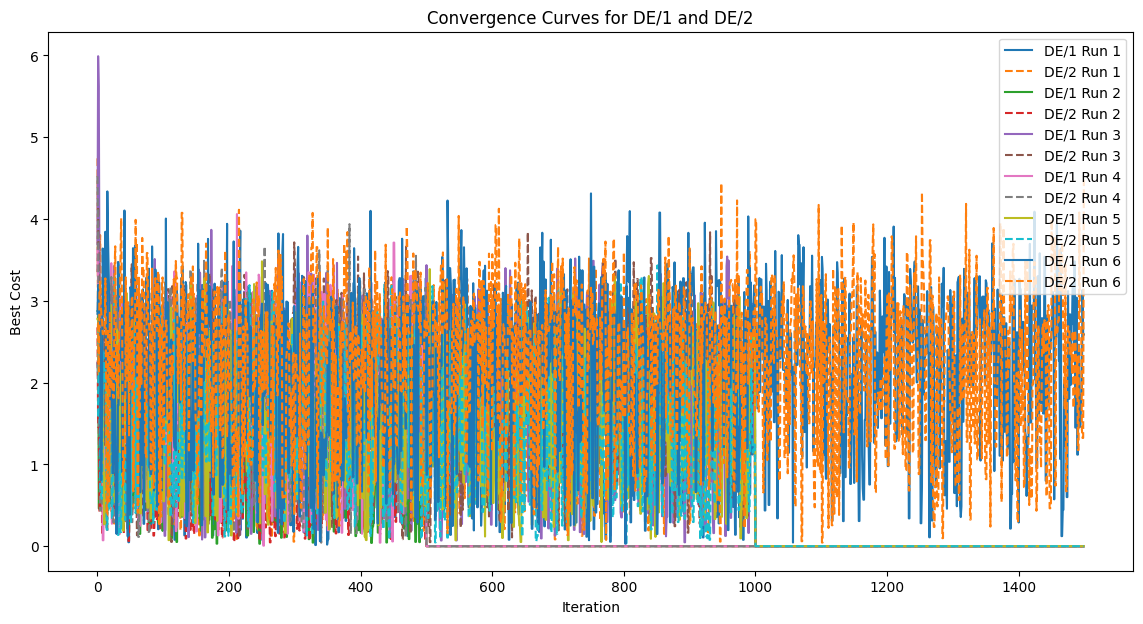

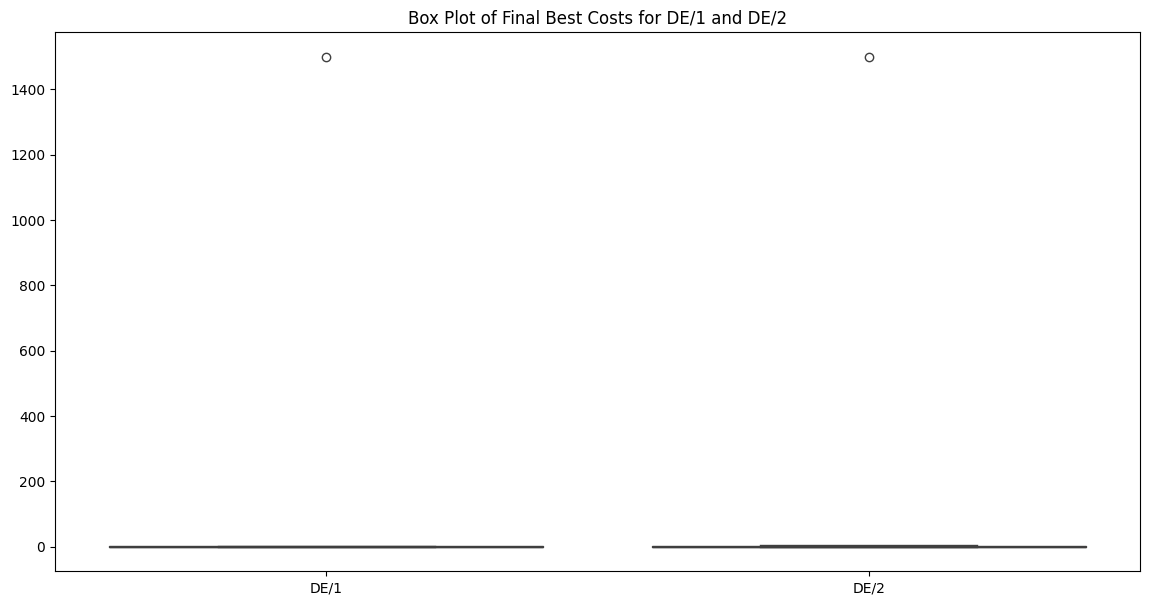

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convergence Curves
plt.figure(figsize=(14, 7))
for i in range(1, 7):  # Assuming you have 6 runs
    plt.plot(de1_data[f'Run{i}'], label=f'DE/1 Run {i}')
    plt.plot(de2_data[f'Run{i}'], label=f'DE/2 Run {i}', linestyle='--')
plt.title('Convergence Curves for DE/1 and DE/2')
plt.xlabel('Iteration')
plt.ylabel('Best Cost')
plt.legend()
plt.show()

# Box Plots for final best costs
plt.figure(figsize=(14, 7))
final_costs = pd.concat([de1_data.iloc[-1], de2_data.iloc[-1]], axis=1)
final_costs.columns = ['DE/1', 'DE/2']
sns.boxplot(data=final_costs)
plt.title('Box Plot of Final Best Costs for DE/1 and DE/2')
plt.show()

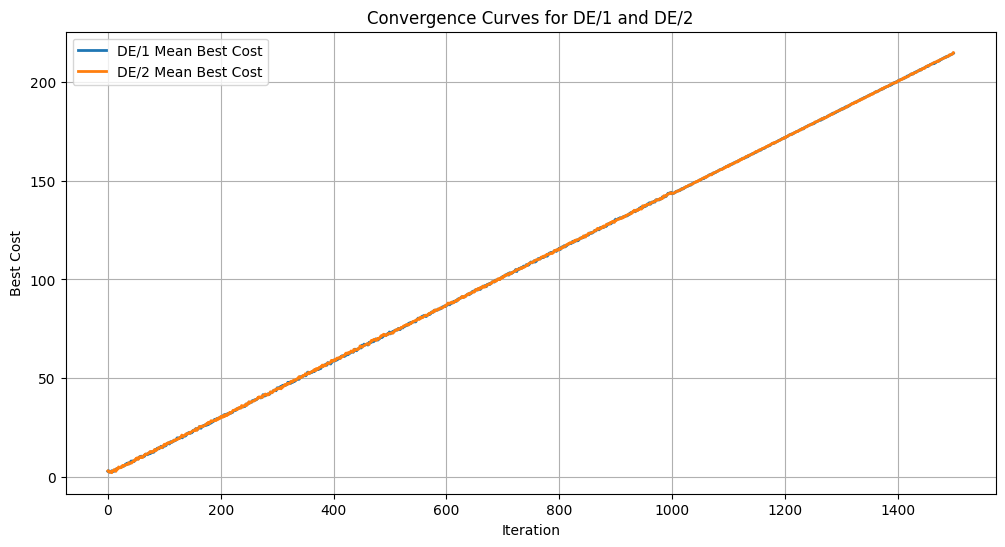

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the average best cost at each iteration for both DE/1 and DE/2
de1_mean = de1_data.mean(axis=1)
de2_mean = de2_data.mean(axis=1)

# Plot the convergence curves
plt.figure(figsize=(12, 6))
plt.plot(de1_mean, label='DE/1 Mean Best Cost', linewidth=2)
plt.plot(de2_mean, label='DE/2 Mean Best Cost', linewidth=2)
plt.title('Convergence Curves for DE/1 and DE/2')
plt.xlabel('Iteration')
plt.ylabel('Best Cost')
plt.legend()
plt.grid(True)
plt.show()

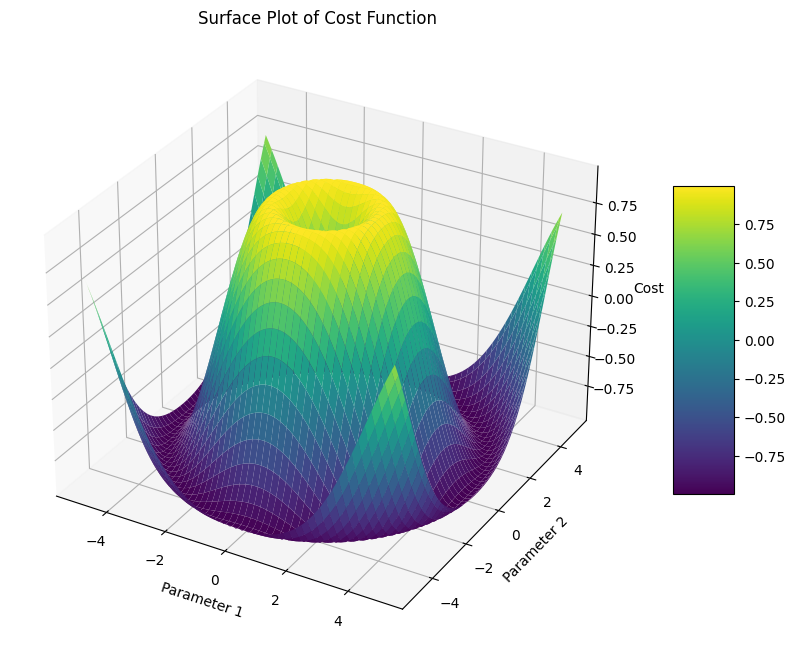

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Sample data - replace these with your actual parameters and costs
X = np.linspace(-5, 5, 100)  # Parameter 1
Y = np.linspace(-5, 5, 100)  # Parameter 2
X, Y = np.meshgrid(X, Y)
Z = np.sin(np.sqrt(X**2 + Y**2))  # Replace with your actual cost function

# Plot the surface plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='viridis')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('Surface Plot of Cost Function')
ax.set_xlabel('Parameter 1')
ax.set_ylabel('Parameter 2')
ax.set_zlabel('Cost')
plt.show()


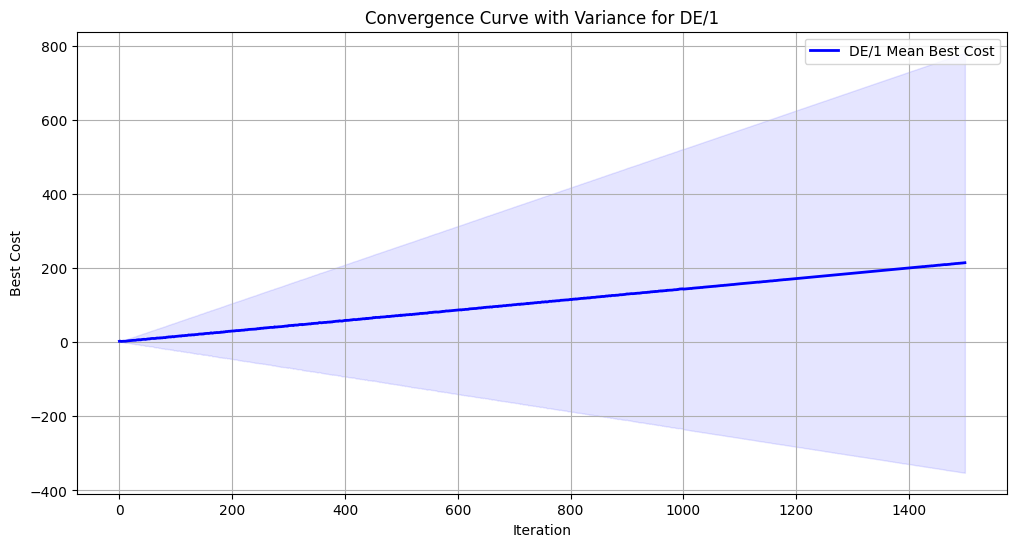

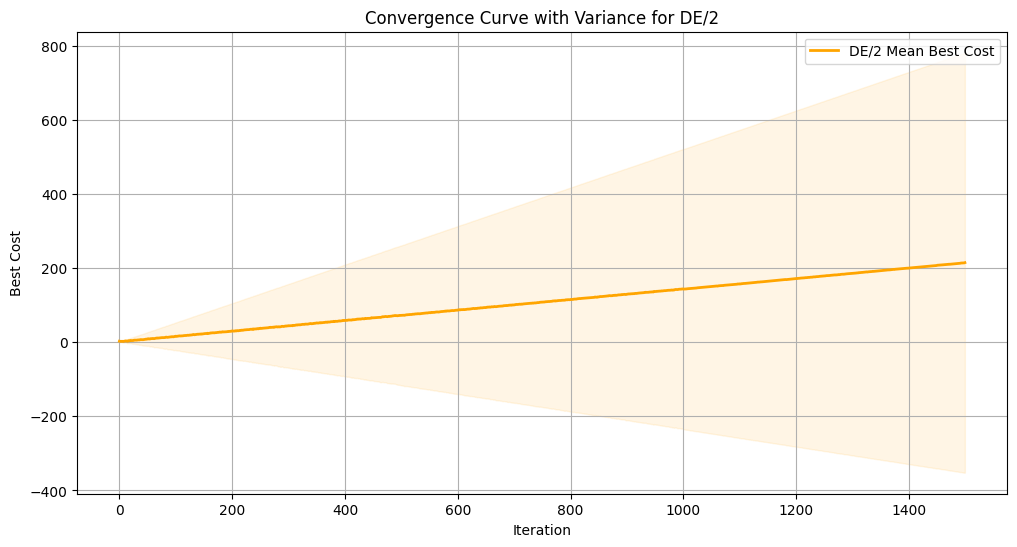

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the mean and standard deviation for each iteration for DE/1
de1_mean = de1_data.mean(axis=1)
de1_std = de1_data.std(axis=1)

# Plot for DE/1
plt.figure(figsize=(12, 6))
plt.plot(de1_mean, label='DE/1 Mean Best Cost', color='blue', linewidth=2)
plt.fill_between(de1_data.index, de1_mean-de1_std, de1_mean+de1_std, color='blue', alpha=0.1)
plt.title('Convergence Curve with Variance for DE/1')
plt.xlabel('Iteration')
plt.ylabel('Best Cost')
plt.legend()
plt.grid(True)
plt.show()

# Calculate the mean and standard deviation for each iteration for DE/2
de2_mean = de2_data.mean(axis=1)
de2_std = de2_data.std(axis=1)

# Plot for DE/2
plt.figure(figsize=(12, 6))
plt.plot(de2_mean, label='DE/2 Mean Best Cost', color='orange', linewidth=2)
plt.fill_between(de2_data.index, de2_mean-de2_std, de2_mean+de2_std, color='orange', alpha=0.1)
plt.title('Convergence Curve with Variance for DE/2')
plt.xlabel('Iteration')
plt.ylabel('Best Cost')
plt.legend()
plt.grid(True)
plt.show()

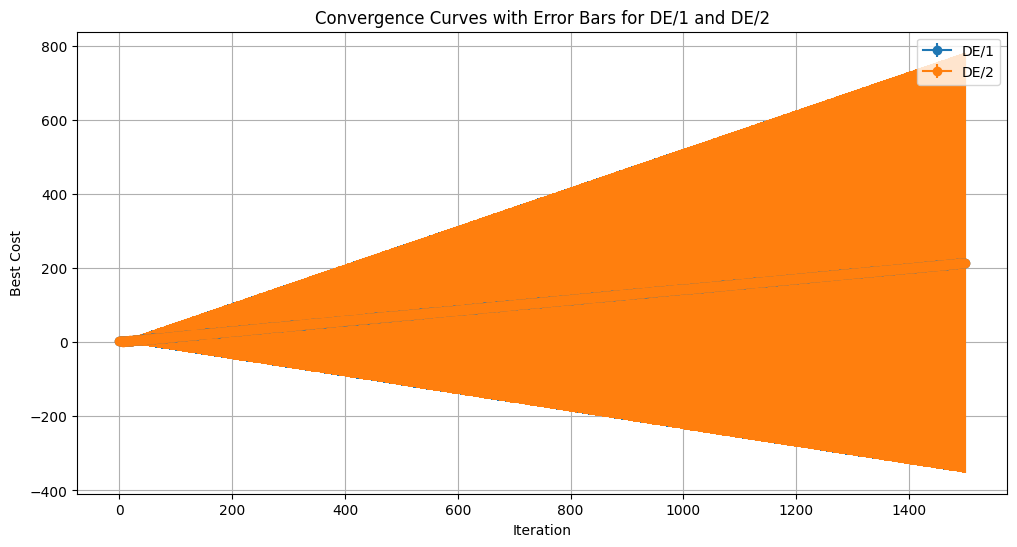

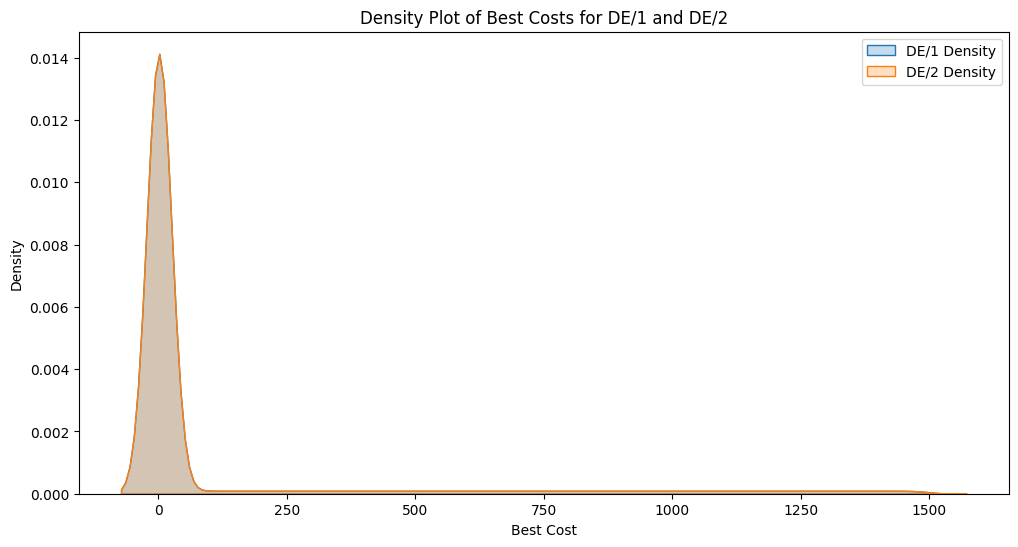

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot with error bars
plt.figure(figsize=(12, 6))
plt.errorbar(x=de1_data.index, y=de1_data.mean(axis=1), yerr=de1_data.std(axis=1), label='DE/1', fmt='-o')
plt.errorbar(x=de2_data.index, y=de2_data.mean(axis=1), yerr=de2_data.std(axis=1), label='DE/2', fmt='-o')
plt.title('Convergence Curves with Error Bars for DE/1 and DE/2')
plt.xlabel('Iteration')
plt.ylabel('Best Cost')
plt.legend()
plt.grid(True)
plt.show()

# Density Plot
plt.figure(figsize=(12, 6))
sns.kdeplot(de1_data.values.flatten(), bw_adjust=0.5, fill=True, common_norm=False, label='DE/1 Density')
sns.kdeplot(de2_data.values.flatten(), bw_adjust=0.5, fill=True, common_norm=False, label='DE/2 Density')
plt.title('Density Plot of Best Costs for DE/1 and DE/2')
plt.xlabel('Best Cost')
plt.legend()
plt.show()


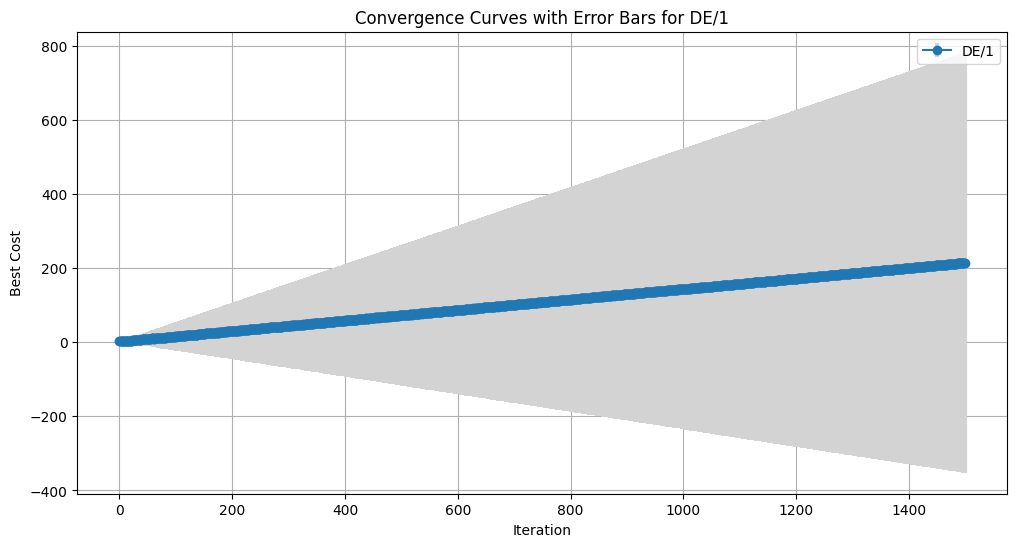

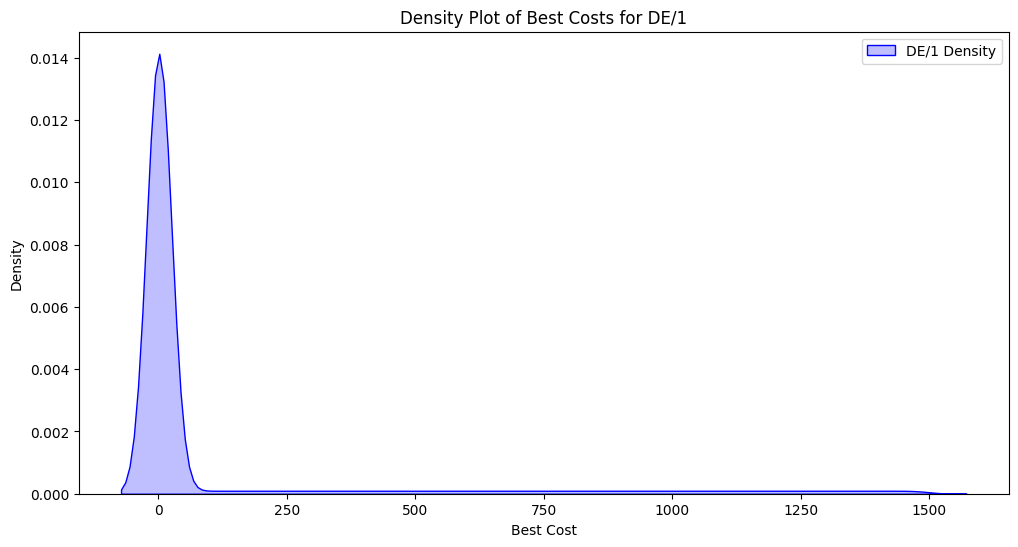

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# For de1_data
# Calculate the mean and standard deviation for the error bars
de1_mean = de1_data.mean(axis=1)
de1_std = de1_data.std(axis=1)

# Convergence curve with error bars for DE/1
plt.figure(figsize=(12, 6))
plt.errorbar(x=de1_data.index, y=de1_mean, yerr=de1_std, label='DE/1', fmt='-o', ecolor='lightgray', elinewidth=3, capsize=0)
plt.title('Convergence Curves with Error Bars for DE/1')
plt.xlabel('Iteration')
plt.ylabel('Best Cost')
plt.legend()
plt.grid(True)
plt.show()

# Density plot for DE/1
plt.figure(figsize=(12, 6))
sns.kdeplot(de1_data.values.flatten(), bw_adjust=0.5, fill=True, label='DE/1 Density', color='blue')
plt.title('Density Plot of Best Costs for DE/1')
plt.xlabel('Best Cost')
plt.legend()
plt.show()

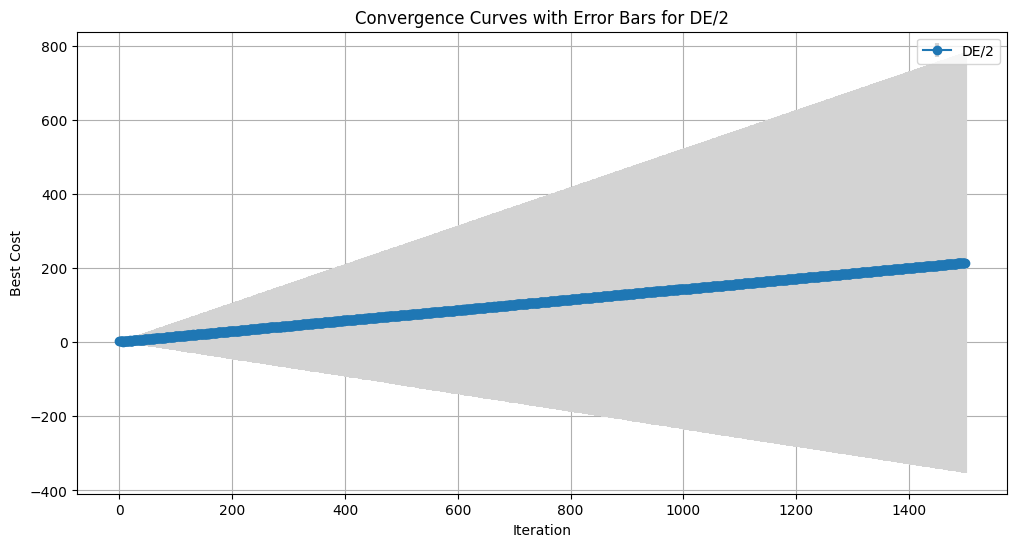

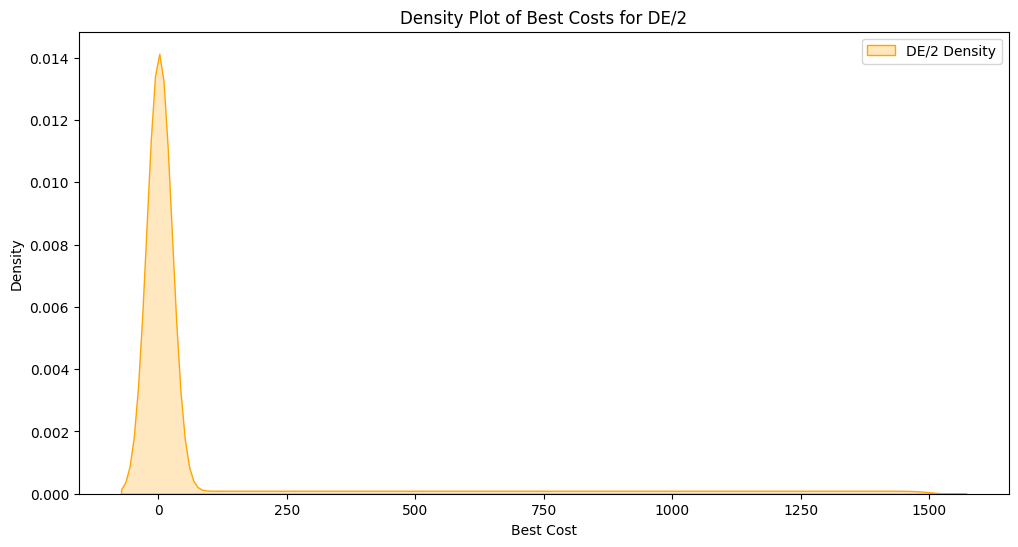

In [ ]:
# For de2_data
# Calculate the mean and standard deviation for the error bars
de2_mean = de2_data.mean(axis=1)
de2_std = de2_data.std(axis=1)

# Convergence curve with error bars for DE/2
plt.figure(figsize=(12, 6))
plt.errorbar(x=de2_data.index, y=de2_mean, yerr=de2_std, label='DE/2', fmt='-o', ecolor='lightgray', elinewidth=3, capsize=0)
plt.title('Convergence Curves with Error Bars for DE/2')
plt.xlabel('Iteration')
plt.ylabel('Best Cost')
plt.legend()
plt.grid(True)
plt.show()

# Density plot for DE/2
plt.figure(figsize=(12, 6))
sns.kdeplot(de2_data.values.flatten(), bw_adjust=0.5, fill=True, label='DE/2 Density', color='orange')
plt.title('Density Plot of Best Costs for DE/2')
plt.xlabel('Best Cost')
plt.legend()
plt.show()


I wanted to conduct a hypothesis test to compare the final best costs achieved by the two DE algorithms, by performing a two-sample t-test. This test will help determine whether there is a significant difference in the mean final best costs between the two algorithms.

In [ ]:
import pandas as pd
from scipy import stats

import pandas as pd
from scipy import stats

# Extract the final best costs for each run
final_costs_de1 = de1_data.iloc[-1]
final_costs_de2 = de2_data.iloc[-1]

# Perform a two-sample t-test
t_stat, p_value = stats.ttest_ind(final_costs_de1, final_costs_de2)

print('T-statistic:', t_stat)
print('p-value:', p_value)

# Interpret the results
alpha = 0.05  # value of alpha is 0.05
if p_value < alpha:
    print('There is a significant difference in the final best costs between DE/1 and DE/2.')
else:
    print('There is no significant difference in the final best costs between DE/1 and DE/2.')


T-statistic: -0.0008902641592855689
p-value: 0.9993043008482962
There is no significant difference in the final best costs between DE/1 and DE/2.
